Name: Zuha Aqib   
ERP ID: 26106    
Section: M/W 10am - Miss Abeera Tariq    
Date: 28th March 2025 

In [1788]:
from datetime import datetime
print("Last time code executed:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Last time code executed: 2025-04-08 22:08:01


# Imports
here we import all necessary documents at once

In [1789]:
from datetime import datetime

# step1: import the data and to access it
import pandas as pd

# step2: numerically manipulate the data
import numpy as np

# step3: visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# step4: fix missing values in the data
from sklearn.impute import SimpleImputer
import missingno as msno
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from statistics import mode

# step5: perform statistical processing on the data
from scipy import stats
from scipy.stats import ttest_ind, f_oneway, chi2_contingency, pearsonr
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [1790]:
# Function to get current date and time as a string
def get_current_datetime():
    return datetime.now().strftime("%Y-%m-%d %H:%M:%S")

In [1791]:
print(pd.__version__)

# so because the version is >= 1.0, dataframe column types can be kept as "string" and not specifically "object"

2.2.2


# Load the dataset
here we load the dataset - using a pandas dataframe

## <span style="background-color: yellow"> Task 1 </span>
Select a dataset of your choice from here https://tinyurl.com/BI-Assignment02-Datasets

In [1792]:
file_path = "data/Healthcare.csv"
file_path

'data/Healthcare.csv'

In [1793]:
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10042 entries, 0 to 10041
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ï»¿Name             10042 non-null  object 
 1   Age                 10042 non-null  int64  
 2   Gender              10040 non-null  object 
 3   Blood Type          10042 non-null  object 
 4   Medical Condition   10042 non-null  object 
 5   Date of Admission   10042 non-null  object 
 6   Doctor              10042 non-null  object 
 7   Hospital            10042 non-null  object 
 8   Insurance Provider  10042 non-null  object 
 9   Billing Amount      10041 non-null  float64
 10  TaxAmount           7873 non-null   float64
 11  Room Number         10038 non-null  float64
 12  Admission Type      10042 non-null  object 
 13  Discharge Date      10042 non-null  object 
 14  Medication          10041 non-null  object 
 15  Test Results        10042 non-null  object 
dtypes: f

In [1794]:
# so gender, billing amount, tax amount, room number and medication have missing values - rest are full. 
missing_columns = ['Gender', 'Billing Amount', 'TaxAmount', 'Room Number', 'Medication']
# this array will be used later in the code in TASK 4

In [1795]:
df.describe(include='all')

,ï»¿Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,TaxAmount,Room Number,Admission Type,Discharge Date,Medication,Test Results
count,10042,10042.000000,10040,10042,10042,10042,10042,10042,10042,10041.000000,7873.000000,10038.000000,10042,10042,10041,10042
unique,9378,NaN,2,8,7,1815,9416,8639,7,NaN,NaN,NaN,6,1834,5,6
top,Michael Johnson,NaN,Female,AB-,Asthma,12/04/2019,Michael Johnson,Smith PLC,Cigna,NaN,NaN,NaN,Urgent,03/03/2021,Penicillin,Abnormal
freq,7,NaN,5089,1279,1717,15,7,19,2048,NaN,NaN,NaN,3408,14,2090,3468
mean,NaN,51.458076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25498.528953,3825.979158,300.039350,NaN,NaN,NaN,NaN
std,NaN,19.586434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14066.329923,2111.511256,115.802392,NaN,NaN,NaN,NaN
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.450000,101.000000,NaN,NaN,NaN,NaN
25%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13481.843600,2012.235405,199.000000,NaN,NaN,NaN,NaN
50%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25236.344760,3807.212264,299.000000,NaN,NaN,NaN,NaN
75%,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37720.039040,5648.364848,400.000000,NaN,NaN,NaN,NaN


In [1796]:
df  # Show first few rows

,ï»¿Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,TaxAmount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,NaN,O-,Diabetes,17/11/2022,Patrick Parker,Wallace-Hamilton,Medicare,37490.983360,5623.647505,146.0,Elective,01/12/2022,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,01/06/2023,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064850,7095.609727,404.0,Emergency,15/06/2023,NaN,Normal
2,Chad Byrd,61,Male,B-,Obesity,09/01/2019,Paul Baker,Walton LLC,Medicare,36874.897000,5531.234549,292.0,Emergency,08/02/2019,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,02/05/2020,Brian Chandler,Garcia Ltd,Medicare,23303.322090,3495.498314,480.0,Urgent,03/05/2020,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,09/07/2021,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344180,2712.951628,477.0,Urgent,02/08/2021,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10037,Christopher Delgado,69,Female,A-,Obesity,08/06/2021,Susan Franklin,Harris LLC,UnitedHealthcare,41867.422770,6280.113415,292.0,Elective,13/06/2021,Aspirin,Normal
10038,Laura Banks,53,Male,A-,Hypertension,07/09/2020,James Fleming,Rice-Hunter,Medicare,30326.548120,4548.982219,464.0,Urgent,02/10/2020,Ibuprofen,Abnormal
10039,John Johnson,58,Female,B-,Obesity,15/02/2019,Blake Young,"Pruitt, Butler and Gonzales",Medicare,15650.891360,2347.633705,323.0,Emergency,13/03/2019,Aspirin,Abnormal
10040,Craig Garcia,32,Male,B-,Asthma,07/07/2023,Bradley Jones,Morris Inc,Blue Cross,23674.450000,3551.167500,457.0,Emergency,08/07/2023,Ibuprofen,Normal


## <span style="background-color: yellow"> Task 2 </span>
Acquire some basic background knowledge about dataset to understand its context
and relevance (if needed).

# Data Preprocessing
here we perform preprocessing steps on the data like cleaning, handling missing values, normalizing etc

## <span style="background-color: yellow"> Task 3 </span>
- a. Develop a strategy to identify and correct data inconsistencies and data entry errors.
- b. Write your strategy in the notebook as markdowns.
- c. Provide brief interpretations of the corrections made.
- d. Majority marks are for this interpretation and for the strategy (not for Python code)

In [1797]:
# i can see that the first column is "?Name" so i will rename it to "Name"
df.rename(columns={df.columns[0]: "Name"}, inplace=True)
print(df.columns)

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'TaxAmount', 'Room Number', 'Admission Type',
       'Discharge Date', 'Medication', 'Test Results'],
      dtype='object')


In [1798]:
# Clean column names (strip special characters, extra spaces)
df.columns = df.columns.str.strip().str.replace(r"[^\w\s]", "").str.replace("  ", " ")
print(df.columns)

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'TaxAmount', 'Room Number', 'Admission Type',
       'Discharge Date', 'Medication', 'Test Results'],
      dtype='object')


In [1799]:
# remove whitespaces
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

### Analyzing Name Column
- first convert column to string
- here i noticed an inconsistency that if its "Mrs." so the gender type should also match and be "Female", but for row 4, its "Male" which is wrong. So i will correct it.
- then drop all names that have less than 1 length

In [1800]:
# Convert to 'string' dtype (pandas 1.0+)
df['Name'] = df['Name'].astype('string')
print(df['Name'].dtype)  

string


In [1801]:
count_changed = 0

# Define title-gender rules (case-insensitive)
title_rules = {
    'mr.': 'Male',       # Mr. → Male
    'mrs.': 'Female',      # Mrs. → Female
    'miss': 'Female',      # Miss → Female
    'ms.': 'Female'        # Ms. → Female
}

# Check and correct genders
for index, row in df.iterrows():
    name = str(row['Name']).lower()  # Convert to lowercase for case-insensitive check
    current_gender = row['Gender']
    
    for title, expected_gender in title_rules.items():
        if title in name:
            if pd.isna(row['Gender']):
                print(f"Correcting '{row['Name']}': Gender '{expected_gender}'")
                df.at[index, 'Gender'] = expected_gender
                count_changed += 1
            elif current_gender != expected_gender:
                print(f"Correcting '{row['Name']}': Gender '{current_gender}' → '{expected_gender}'")
                df.at[index, 'Gender'] = expected_gender
                count_changed += 1
            break  # Stop after first title match
print(count_changed)

Correcting 'Mrs. Brandy Flowers': Gender 'Male' → 'Female'
Correcting 'Mrs. Caroline Farrell': Gender 'Female'
Correcting 'Mrs. Ashley Simpson MD': Gender 'Male' → 'Female'
Correcting 'Mr. John Martin DVM': Gender 'Female' → 'Male'
Correcting 'Mr. Christopher Burns DDS': Gender 'Female' → 'Male'
Correcting 'Miss Courtney Navarro': Gender 'Male' → 'Female'
Correcting 'Mrs. Natasha Williams': Gender 'Male' → 'Female'
Correcting 'Miss Lisa Hale': Gender 'Male' → 'Female'
Correcting 'Mrs. Jessica Larsen MD': Gender 'Male' → 'Female'
Correcting 'Mr. Shawn Davis Jr.': Gender 'Female' → 'Male'
Correcting 'Mr. Joshua Salazar': Gender 'Female' → 'Male'
Correcting 'Mrs. Anne Reid MD': Gender 'Male' → 'Female'
Correcting 'Mr. Taylor Williams DDS': Gender 'Female' → 'Male'
Correcting 'Mr. John Wright': Gender 'Female' → 'Male'


Correcting 'Mr. Brian Chavez': Gender 'Female' → 'Male'
Correcting 'Mrs. Zoe Bartlett': Gender 'Male' → 'Female'
Correcting 'Miss Denise Webster DVM': Gender 'Male' → 'Female'
Correcting 'Mrs. Kimberly Hogan DDS': Gender 'Male' → 'Female'
Correcting 'Ms. Debra Ramirez': Gender 'Male' → 'Female'
Correcting 'Miss Danielle Boyd DVM': Gender 'Male' → 'Female'
Correcting 'Mr. Jared Bell': Gender 'Female' → 'Male'
Correcting 'Mrs. Donna Bishop': Gender 'Male' → 'Female'
Correcting 'Mr. Charles Myers DVM': Gender 'Female' → 'Male'
Correcting 'Mr. Tyler Parks MD': Gender 'Female' → 'Male'
Correcting 'Mrs. Stephanie Mcbride': Gender 'Male' → 'Female'
Correcting 'Mr. James Coleman DDS': Gender 'Female' → 'Male'
Correcting 'Ms. Megan Hale': Gender 'Male' → 'Female'
Correcting 'Ms. Gina Ross': Gender 'Male' → 'Female'
Correcting 'Mrs. Michelle Berry': Gender 'Male' → 'Female'
Correcting 'Ms. Raven Smith': Gender 'Male' → 'Female'
Correcting 'Mr. Ryan Bradley': Gender 'Female' → 'Male'
Correcting '

In [1802]:
# wow thats alot of mismatch. i had added some code for doctors and professors, but then it was becoming a hassle so i removed it.

# lets also remove names with less than <=1 length
total_rows_before = len(df)  # Count total rows before dropping

# Drop rows where 'hospital' has <=1 character 
df= df[df['Name'].str.len() > 1 | df['Name'].isna()].copy()  # Using .copy() to avoid SettingWithCopyWarning

# Calculate rows dropped
rows_dropped = total_rows_before - len(df)

# Display results
print(f"Total rows before dropping: {total_rows_before}")
print(f"Rows dropped (Name ≤1 char): {rows_dropped}")
print(f"Remaining rows: {len(df)}")

Total rows before dropping: 10042
Rows dropped (Name ≤1 char): 0
Remaining rows: 10042


### <span style="background-color: orange"> API WORK </span>
- here we make a function `to_string()` which basically converts a given column name to a string type
- next we will make a function `to_int()` which converts a given column name to an integer type
- next we will make a function `to_float()` which converts a given column name to a float type
- next we will make a function `remove_small_size_names()` which removes all small sized names

In [1803]:
def api_to_string(df, column_name):
    """
    Convert a pandas DataFrame column to a string.
    """
    df[column_name] = df[column_name].astype('string')
    print(f"Column Name: '{column_name}', Type: {df[column_name].dtype}")
    return df  

In [1804]:
def api_to_int(df, column_name):
    """
    Convert a pandas DataFrame column to a int.
    """
    df[column_name] = df[column_name].astype('int64')
    print(f"Column Name: '{column_name}', Type: {df[column_name].dtype}")
    return df  

In [1805]:
def api_to_float(df, column_name):
    """
    Convert a pandas DataFrame column to a float.
    """
    df[column_name] = df[column_name].astype('float64')
    print(f"Column Name: '{column_name}', Type: {df[column_name].dtype}")
    return df  

In [1806]:
def api_remove_small_size_names(df, column_name, lower_limit=1):
    # lets also remove names with less than <=lowerlimit length
    total_rows_before = len(df)  # Count total rows before dropping

    # Drop rows where column has <=1 character 
    df= df[df[column_name].str.len() > lower_limit | df[column_name].isna()].copy()  # Using .copy() to avoid SettingWithCopyWarning

    # Calculate rows dropped
    rows_dropped = total_rows_before - len(df)

    # Display results
    print(f"Total rows before dropping: {total_rows_before}")
    print(f"Rows dropped ('{column_name}' ≤{lower_limit} char): {rows_dropped}")
    print(f"Remaining rows: {len(df)}")
    
    return df

### Analyzing Age Column
- here we can check that all ages should be >0 and <100, and we can also find the counts of each age group to see which ones we mostly deal with. 
- we will also additionally convert the age column to a numerical type to be able to perform numerical operations on it.

In [1807]:
# Count ages less than 0 or greater than 100
invalid_age_count = ((df['Age'] < 0) | (df['Age'] > 100)).sum()
print("Number of invalid ages (<0 or >100):", invalid_age_count)

Number of invalid ages (<0 or >100): 0


In [1808]:
# okay great! none invalid. lets apply a loop to see how many ages are in which range
for category in range(10, 101, 10):
    age_range_count = ((df['Age'] >= (category-10)) & (df['Age'] <= category)).sum()
    print("(",(category-10),",",category,") = ", age_range_count)

( 0 , 10 ) =  0
( 10 , 20 ) =  466
( 20 , 30 ) =  1611
( 30 , 40 ) =  1642
( 40 , 50 ) =  1532
( 50 , 60 ) =  1683
( 60 , 70 ) =  1604
( 70 , 80 ) =  1662
( 80 , 90 ) =  827
( 90 , 100 ) =  0


In [1809]:
# so from these range counts we see that we don't have too young or too old people, and majority are adults between 20 and 80. there is no data inconsistency. 

# lets lastly convert all the data to numeric and see how many are null
df = api_to_int(df, 'Age')

print(df['Age'].isnull().sum())

Column Name: 'Age', Type: int64
0


### <span style="background-color: orange"> API WORK </span>
- create a function `limit_checker()` that drops all rows of a numeric column that are less than a certain threshold

In [1810]:
def api_limit_checker(df, lower_limit, upper_limit, column_name):
    if upper_limit is None:
        invalid_mask = (df[column_name] < lower_limit)
    else:
        invalid_mask = (df[column_name] < lower_limit) | (df[column_name] > upper_limit)
    invalid = invalid_mask.sum()
    print(f"Number of invalid (<{lower_limit} or >{upper_limit}):{invalid}")
    
    if invalid > 0:
        # Drop invalid rows and keep the rest
        df_filtered = df[~invalid_mask].copy()  # ~ means logical NOT
        dropped_count = len(df) - len(df_filtered)
        
        print(f"Dropped {dropped_count} rows.")
        return df_filtered
    else:
        print("No rows to drop.")
        return df.copy()

### Analyzing Gender Column
- here we first need to make everyone lowercase and remove trailing spaces because 'male', 'Male', 'Male ', ' Male' all are same
- then we can convert to M F to make it more readable and less data storage
- then we can find the empty spaces that don't have a gender. these will be dealt later in task 4
- then we convert the column to string

In [1811]:
# now lets all see the count of all of the males and females
gender_counts = df['Gender'].value_counts()
print("Gender Counts:\n", gender_counts)

Gender Counts:
 Gender
Female    5093
Male      4948
Name: count, dtype: int64


In [1812]:
# convert genders to lowercase
df['Gender'] = df['Gender'].str.lower()

# now lets convert all 'Male' to M and 'Female' to F
df['Gender'] = df['Gender'].replace({'male': 'M', 'female': 'F'})

# now lets all see the count of all of the males and females
gender_counts = df['Gender'].value_counts()
print("Gender Counts:\n", gender_counts)

Gender Counts:
 Gender
F    5093
M    4948
Name: count, dtype: int64


In [1813]:
# so theres not much of a difference between males and females.

# lets convert the column to gender
df = api_to_string(df, 'Gender')

Column Name: 'Gender', Type: string


### Analyzing Blood Type Column
- so according to the internet there are 8 blood types, there are many more but they are very unquie and rare.
- we can first extract the unique blood types and their count. if there are some blood types which EXIST and only occur RARELY then we can keep them but if there are blood types which DONT EXIST then we can remove all those rows.
- we can also capitalize all of them first to make it more easier
- also convert column to string

In [1814]:
# Convert to 'string' dtype (pandas 1.0+)
df = api_to_string(df, 'Blood Type')

Column Name: 'Blood Type', Type: string


In [1815]:
# before beginning the unique extraction, lets make them all capital
df['Blood Type'] = df['Blood Type'].str.upper()

# lets extract all unique values
unique_blood_types = df['Blood Type'].unique()
print("Unique Blood Types:", unique_blood_types)

Unique Blood Types: <StringArray>
['O-', 'O+', 'B-', 'AB+', 'A+', 'AB-', 'A-', 'B+']
Length: 8, dtype: string


In [1816]:
# so these are the 8 blood types in the world. but lets just find their counts to see if any of them are rare?
blood_type_counts = df['Blood Type'].value_counts()
print("\nBlood Type Counts:\n", blood_type_counts)


Blood Type Counts:
 Blood Type
AB-    1279
AB+    1261
B-     1257
O-     1251
A-     1251
B+     1250
O+     1249
A+     1244
Name: count, dtype: Int64


In [1817]:
# so all the blood types are fine. we dont have to remove any.

### Analyzing Medical Condition Column
- same as blood type, lets first extract the unique columns and analyse their counts. 
- here we wont convert the entire thing to lower/upper, we will convert while counting but not fix it
- also convert to string

In [1818]:
# Convert to 'string' dtype (pandas 1.0+)
df = api_to_string(df, 'Medical Condition')

Column Name: 'Medical Condition', Type: string


In [1819]:
# lets see how many medical conditions we have
unique_medical_conditions = df['Medical Condition'].str.lower().unique()
print("Unique Medical Conditions:", unique_medical_conditions)

Unique Medical Conditions: <StringArray>
[     'diabetes',        'asthma',       'obesity',     'arthritis',
  'hypertension',        'cancer', 'hypertensions']
Length: 7, dtype: string


In [1820]:
# oh so we see that hypertension is repeated with one difference. lets first find the counts to see how many are repeated differently
medical_conditions_counts = df['Medical Condition'].value_counts()
print("\nMedical Condition Counts:\n", medical_conditions_counts)


Medical Condition Counts:
 Medical Condition
Asthma           1717
Cancer           1710
Hypertension     1697
Arthritis        1655
Obesity          1634
Diabetes         1628
Hypertensions       1
Name: count, dtype: Int64


In [1821]:
# so we can clearly see that 'Hypertensions' is a simple mistake made in data entry. lets convert that single one to 'Hypertension'
df['Medical Condition'] = df['Medical Condition'].replace('Hypertensions', 'Hypertension')
# now instead of printing the df again, lets re-calculate the count of conditions and analyze that
medical_conditions_counts = df['Medical Condition'].value_counts()
print("\nMedical Condition Counts:\n", medical_conditions_counts)


Medical Condition Counts:
 Medical Condition
Asthma          1717
Cancer          1710
Hypertension    1698
Arthritis       1655
Obesity         1634
Diabetes        1628
Name: count, dtype: Int64


### Analyzing Date of Admission Column
- lets first try a unique() and see it, it will give us the count of unique values in the column.
- then lets convert all to date_time format

In [1822]:
unique_admission_date = df['Date of Admission'].value_counts()
print("\nunique_admission_date Counts:\n", unique_admission_date)


unique_admission_date Counts:
 Date of Admission
12/04/2019    15
27/04/2022    15
27/03/2023    14
04/06/2022    14
21/08/2022    14
              ..
03/10/2021     1
18/12/2021     1
14/11/2019     1
05/03/2021     1
13/11/2020     1
Name: count, Length: 1815, dtype: int64


In [1823]:
# okay so reading all 1800 values is a hassle, lets just convert to date and time format
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], errors='coerce', dayfirst=True)
df['Date of Admission']

0       2022-11-17
1       2023-06-01
2       2019-01-09
3       2020-05-02
4       2021-07-09
           ...    
10037   2021-06-08
10038   2020-09-07
10039   2019-02-15
10040   2023-07-07
10041   2020-02-26
Name: Date of Admission, Length: 10042, dtype: datetime64[ns]

In [1824]:
# after printing we can see its converted. lets also see how many are null.
print(df['Date of Admission'].isna().sum())

0


### <span style="background-color: orange"> API WORK </span>
- create a function `to_date_time()` which converts a columns datatype to date_time

In [1825]:
def api_to_date_time(df, column_name):
    df[column_name] = pd.to_datetime(df[column_name], errors='coerce', dayfirst=True)
    df[column_name]
    print(f"Column Name: '{column_name}', Type: {df[column_name].dtype}")
    return df  

### Analyzing Doctor Column
- convert to string
- extract unique doctor names, and count of each name
- drop all rows with names less than length 1 (i.e., empty strings, or single letter names)

In [1826]:
# Convert to 'string' dtype (pandas 1.0+)
df = api_to_string(df, 'Doctor')

Column Name: 'Doctor', Type: string


In [1827]:
unique_doctor = df['Doctor'].value_counts()
print("\n unique_doctor Counts:\n", unique_doctor)


 unique_doctor Counts:
 Doctor
Michael Johnson      7
Michelle Anderson    5
James Williams       5
Jennifer Smith       5
James Perez          5
                    ..
Tyler Ellis          1
Martin Wu            1
Jennifer Campbell    1
Jennifer Huff        1
Tasha Avila          1
Name: count, Length: 9416, dtype: Int64


In [1828]:
df = api_remove_small_size_names(df, 'Doctor')

Total rows before dropping: 10042
Rows dropped ('Doctor' ≤1 char): 0
Remaining rows: 10042


### Analyzing Hospital Column
- convert to string
- extract unique hospital names and count of each name
- drop all hospital names that have less than one length and are not empty

In [1829]:
# Convert to 'string' dtype (pandas 1.0+)
df['Hospital'] = df['Hospital'].astype('string')
print(df['Hospital'].dtype)  

string


In [1830]:
unique_hospital = df['Hospital'].value_counts()
print("\n unique_hospital Counts:\n", unique_hospital)


 unique_hospital Counts:
 Hospital
Smith PLC                    19
Smith and Sons               17
Smith Ltd                    14
Smith Inc                    14
Johnson PLC                  13
                             ..
Trevino-Johnson               1
Graham-Mcguire                1
Miller, Chavez and Dalton     1
Nelson-Jones                  1
Torres, Young and Stewart     1
Name: count, Length: 8639, dtype: Int64


In [1831]:
# im not really sure what to clean here, i can run the reject all length lesser than 1 names, but i dont think there shall be such a case
df = api_remove_small_size_names(df, 'Hospital')

Total rows before dropping: 10042
Rows dropped ('Hospital' ≤1 char): 0
Remaining rows: 10042


### Analyzing Insurance Provider Column
- convert to string
- fix any miss spellings

In [1832]:
df = api_to_string(df, 'Insurance Provider')

Column Name: 'Insurance Provider', Type: string


In [1833]:
unique = df['Insurance Provider'].value_counts()
print("\n unique Counts:\n", unique)


 unique Counts:
 Insurance Provider
Cigna               2048
Blue Cross          2036
Aetna               2035
UnitedHealthcare    1984
Medicare            1937
Blue Crosser           1
Blue Crossss           1
Name: count, dtype: Int64


In [1834]:
df['Insurance Provider'] = df['Insurance Provider'].replace('Blue Crosser', 'Blue Cross')
df['Insurance Provider'] = df['Insurance Provider'].replace('Blue Crossss', 'Blue Cross')

unique = df['Insurance Provider'].value_counts()
print("\n unique Counts:\n", unique)


 unique Counts:
 Insurance Provider
Cigna               2048
Blue Cross          2038
Aetna               2035
UnitedHealthcare    1984
Medicare            1937
Name: count, dtype: Int64


### Analyzing Billing Amount Column
- already in correct type
- check if any of the values are out of bound

In [1835]:
df = api_limit_checker(df, 0, None, 'Billing Amount')

Number of invalid (<0 or >None):0
No rows to drop.


### Analyzing Tax Amount Column
- compute the average tax percentage
- remove all rows that are not having the average tax percentage

In [1836]:
# Calculate tax percentages (only where tax is not empty)
tax_percentages = []
rows_to_drop = [] # these rows we will drop if they are too different from the tax %

for index, row in df.iterrows():
    # Skip if TaxAmount is NaN or Billing Amount is zero/NaN
    if not pd.isna(row['TaxAmount']) and not pd.isna(row['Billing Amount']) and row['Billing Amount'] != 0:
        tax_percent = (row['TaxAmount'] / row['Billing Amount']) * 100
        if not (14 <= tax_percent <= 16):
            rows_to_drop.append(index)
        tax_percentages.append(tax_percent)

# Compute average tax percentage
average_tax_percent = np.mean(tax_percentages) if tax_percentages else 0

df = df.drop(rows_to_drop)
print(f"Rows dropped: {len(rows_to_drop)}")

print(f"Average Tax Percentage: {average_tax_percent:.2f}%")

Rows dropped: 0
Average Tax Percentage: 15.00%


In [1837]:
# so here in the previous code we first iterated over the values, computed the average tax % and dropped all the incorrect values.

### Analyzing Room Number Column
- check if the column can be converted to integer, else keep at float
- get all unique values and check

In [1838]:
df = api_to_float(df, 'Room Number')

Column Name: 'Room Number', Type: float64


In [1839]:
unique = df['Room Number'].value_counts()
print("\n unique Counts:\n", unique)


 unique Counts:
 Room Number
358.0    44
230.0    40
257.0    38
469.0    37
195.0    36
         ..
160.0    14
306.0    14
321.0    14
373.0    14
352.0    10
Name: count, Length: 400, dtype: int64


### Analyzing Admission Type Column
- convert to string
- extract all unique values and fix incorrect ones

In [1840]:
df = api_to_string(df, 'Admission Type')

Column Name: 'Admission Type', Type: string


In [1841]:
unique = df['Admission Type'].value_counts()
print("\n unique Counts:\n", unique)


 unique Counts:
 Admission Type
Urgent        3408
Emergency     3377
Elective      3253
ELECTIvess       2
Electivess       1
Emergecn.        1
Name: count, dtype: Int64


In [1842]:
df['Admission Type'] = df['Admission Type'].replace('ELECTIvess', 'Elective')
df['Admission Type'] = df['Admission Type'].replace('Electivess', 'Elective')
df['Admission Type'] = df['Admission Type'].replace('Emergecn.', 'Emergency')

unique = df['Admission Type'].value_counts()
print("\n unique Counts:\n", unique)


 unique Counts:
 Admission Type
Urgent       3408
Emergency    3378
Elective     3256
Name: count, dtype: Int64


### Analyzing Discharge Date Column
- convert to date, time format

In [1843]:
# lets just convert to date and time format
df = api_to_date_time(df, 'Discharge Date')

Column Name: 'Discharge Date', Type: datetime64[ns]


### Analyzing Medication Column
- cpnvert to string
- analyse strings to find any misspelled

In [1844]:
df = api_to_string(df, 'Medication')

Column Name: 'Medication', Type: string


In [1845]:
unique = df['Medication'].value_counts()
print("\n unique Counts:\n", unique)


 unique Counts:
 Medication
Penicillin     2090
Lipitor        2025
Ibuprofen      1980
Aspirin        1978
Paracetamol    1968
Name: count, dtype: Int64


### Analyzing Test Results Column
- convert to string
- fix any misspells

In [1846]:
df = api_to_string(df, 'Test Results')

Column Name: 'Test Results', Type: string


In [1847]:
unique = df['Test Results'].value_counts()
print("\n unique Counts:\n", unique)


 unique Counts:
 Test Results
Abnormal           3468
Inconclusive       3289
Normal             3280
Normalll              3
Abnormall             1
Inconclusiveity       1
Name: count, dtype: Int64


In [1848]:
df['Test Results'] = df['Test Results'].replace('Normalll', 'Normal')
df['Test Results'] = df['Test Results'].replace('Abnormall', 'Abnormal')
df['Test Results'] = df['Test Results'].replace('Inconclusiveity', 'Inconclusive')

unique = df['Test Results'].value_counts()
print("\n unique Counts:\n", unique)


 unique Counts:
 Test Results
Abnormal        3469
Inconclusive    3290
Normal          3283
Name: count, dtype: Int64


### Recheck
now lets see the dataset after all columns have been cleaned

In [1849]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10042 entries, 0 to 10041
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                10042 non-null  string        
 1   Age                 10042 non-null  int64         
 2   Gender              10041 non-null  string        
 3   Blood Type          10042 non-null  string        
 4   Medical Condition   10042 non-null  string        
 5   Date of Admission   10042 non-null  datetime64[ns]
 6   Doctor              10042 non-null  string        
 7   Hospital            10042 non-null  string        
 8   Insurance Provider  10042 non-null  string        
 9   Billing Amount      10041 non-null  float64       
 10  TaxAmount           7873 non-null   float64       
 11  Room Number         10038 non-null  float64       
 12  Admission Type      10042 non-null  string        
 13  Discharge Date      10042 non-null  datetime64

## <span style="background-color: yellow"> Task 4 </span>
- a. Develop a strategy to handle missing values for each column separately.
- b. Write down your strategy in the notebook before you execute it.
- c. Ensure to make use of missingno library for missing value type identification and strategy building.
- d. Write down the interpretation of your results in your notebook as much as is possible. This should be brief, e.g., one sentence to describe a visual output, or 2-3 sentences summarizing a sequence of results etc.
- e. Majority marks are for this interpretation and for the strategy (not for Python code)

In [1850]:
df.isnull().sum()

Name                     0
Age                      0
Gender                   1
Blood Type               0
Medical Condition        0
Date of Admission        0
Doctor                   0
Hospital                 0
Insurance Provider       0
Billing Amount           1
TaxAmount             2169
Room Number              4
Admission Type           0
Discharge Date           0
Medication               1
Test Results             0
dtype: int64

In [1851]:
# so the missing columns are
missing_columns

['Gender', 'Billing Amount', 'TaxAmount', 'Room Number', 'Medication']

### Graphing
here lets do some statistical testing to see the attributes

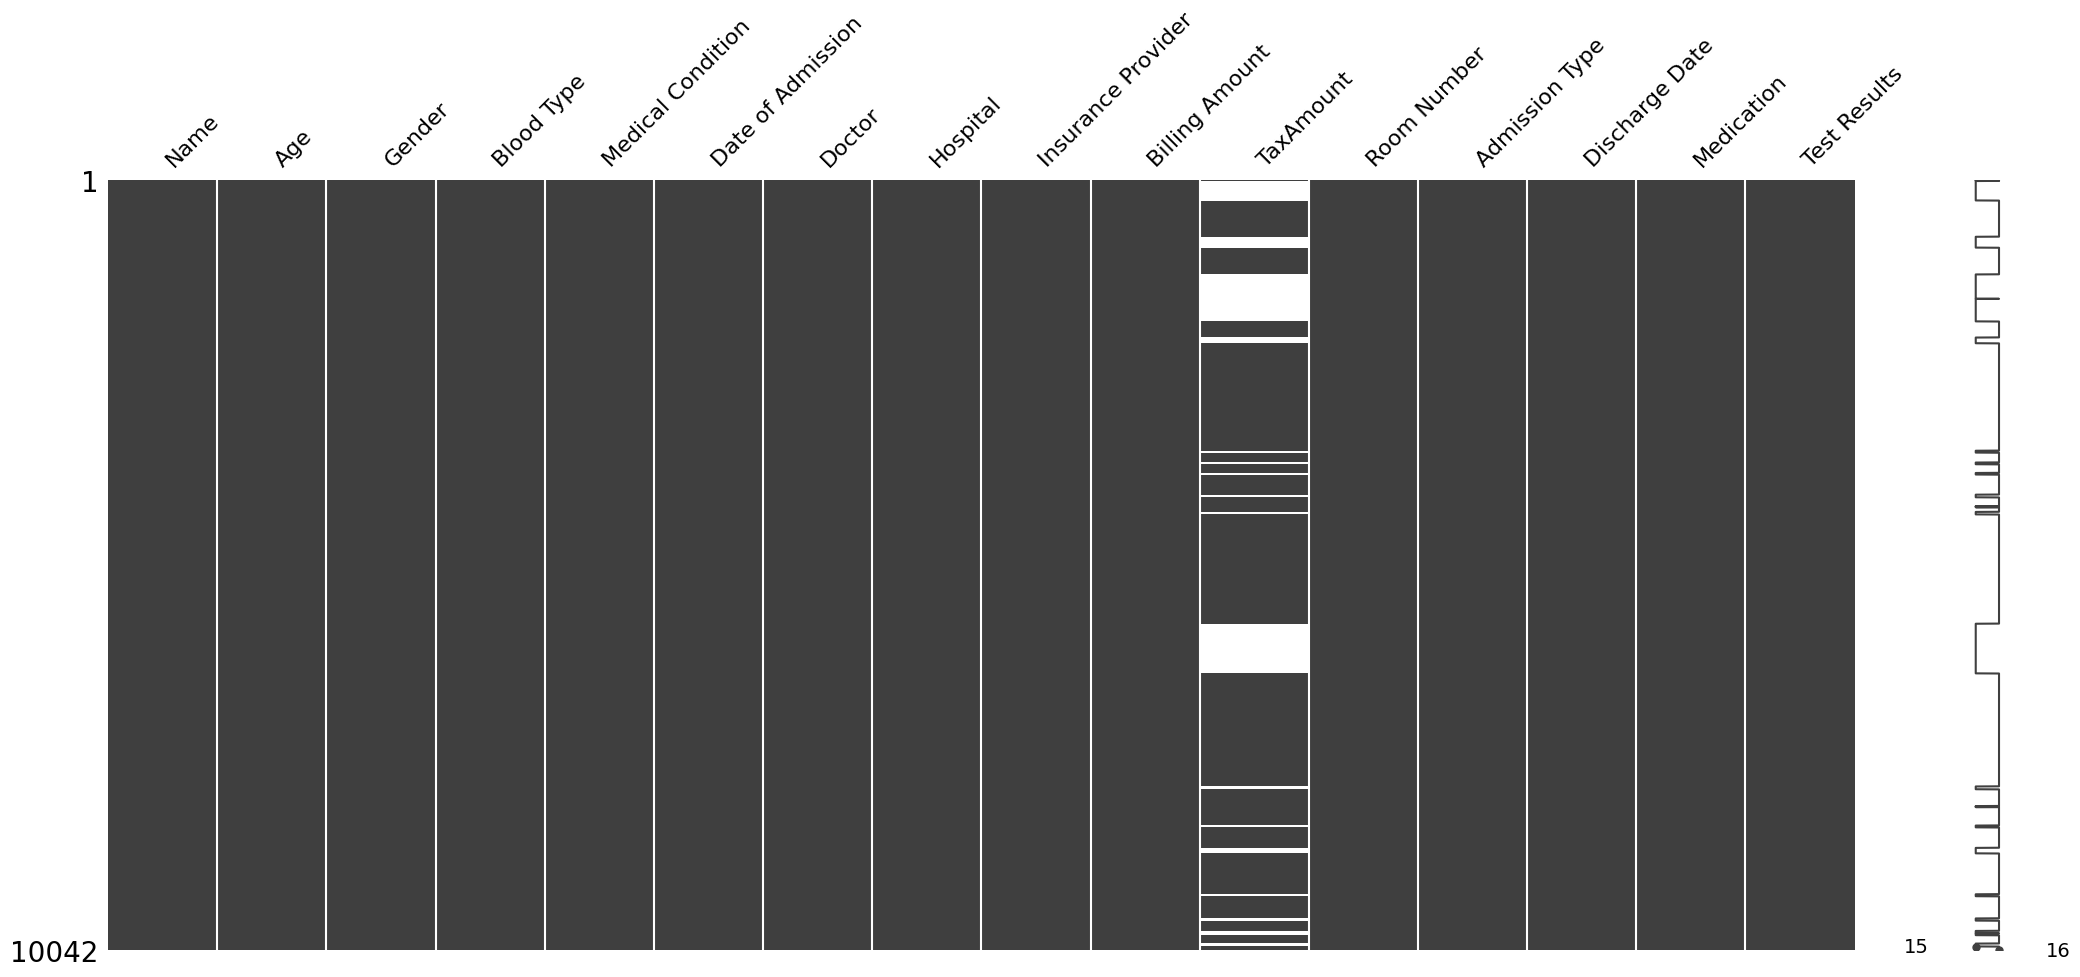

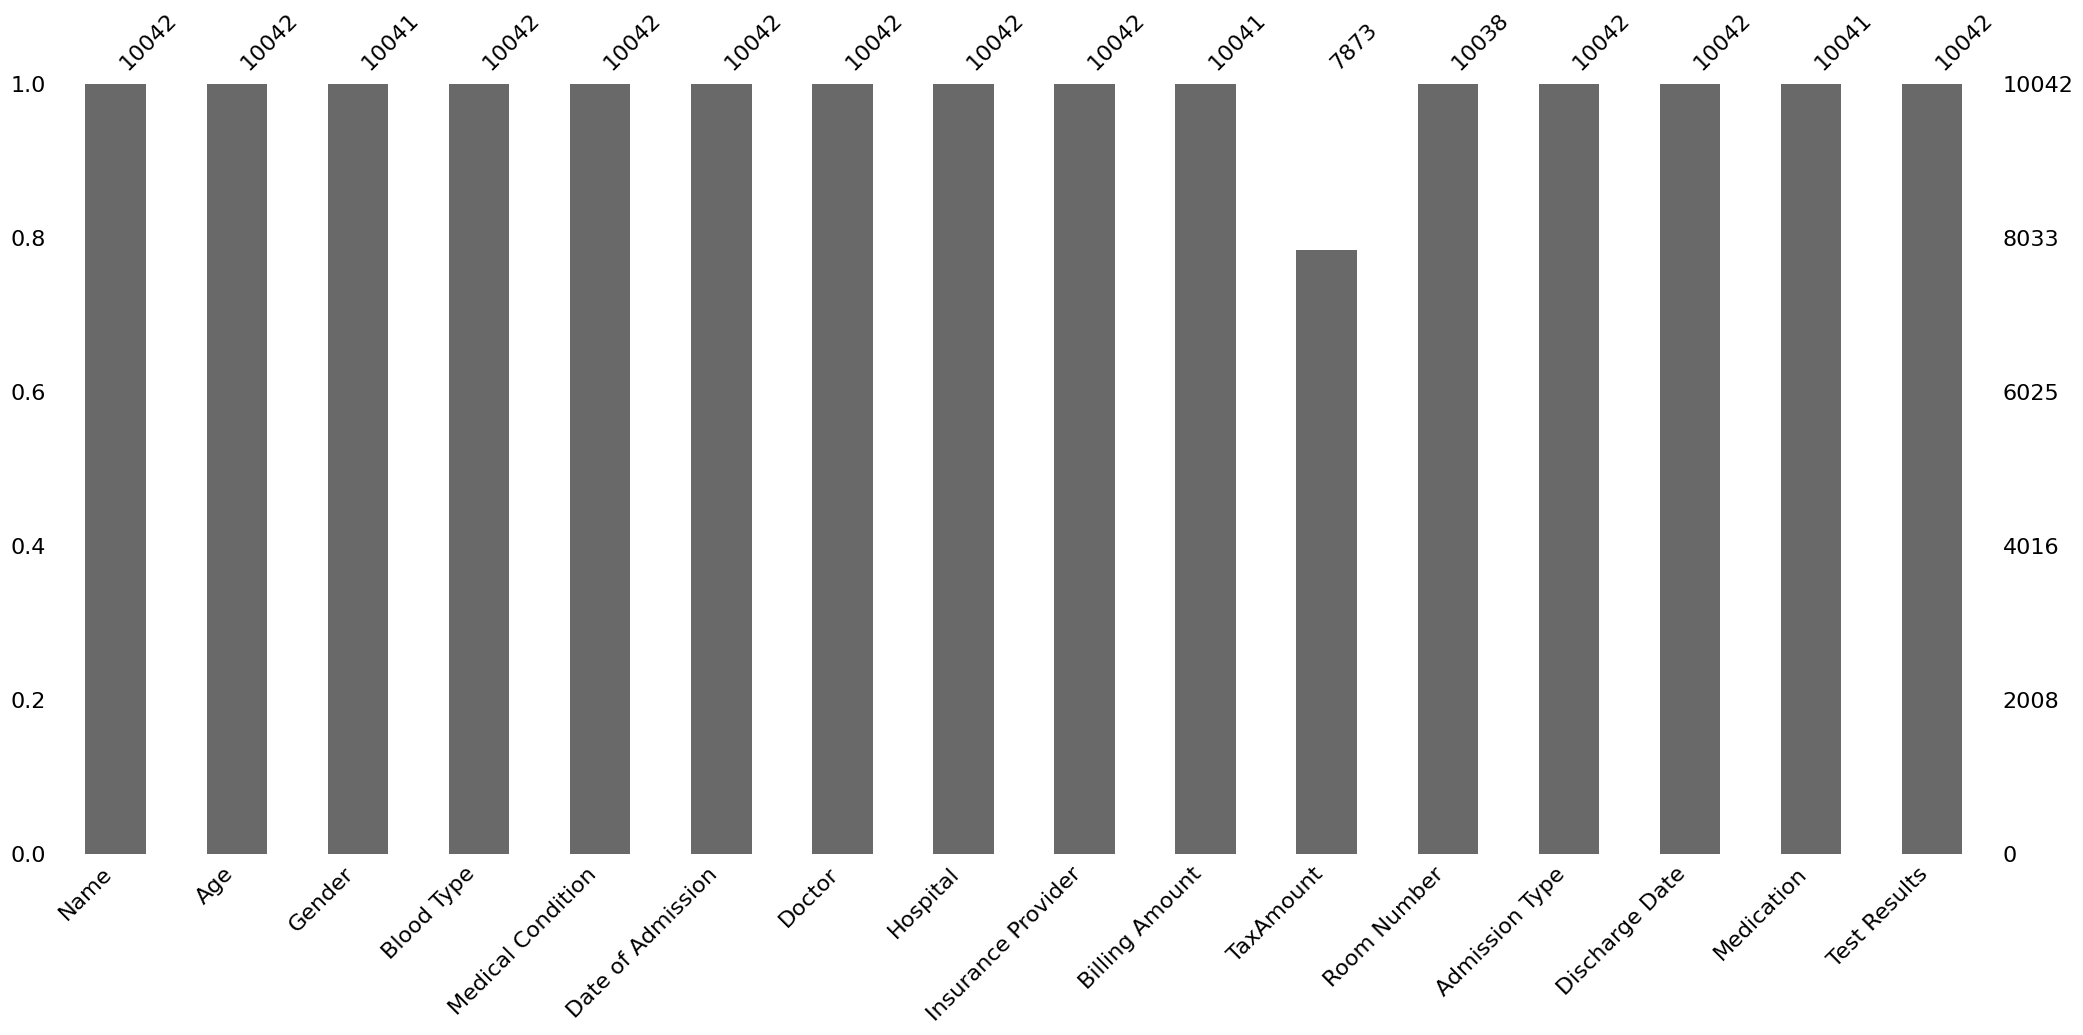

In [1852]:
# Visualize missing data with missingno
msno.matrix(df)
plt.show()

msno.bar(df)
plt.show()

In [1853]:
df.shape

(10042, 16)

<Axes: >

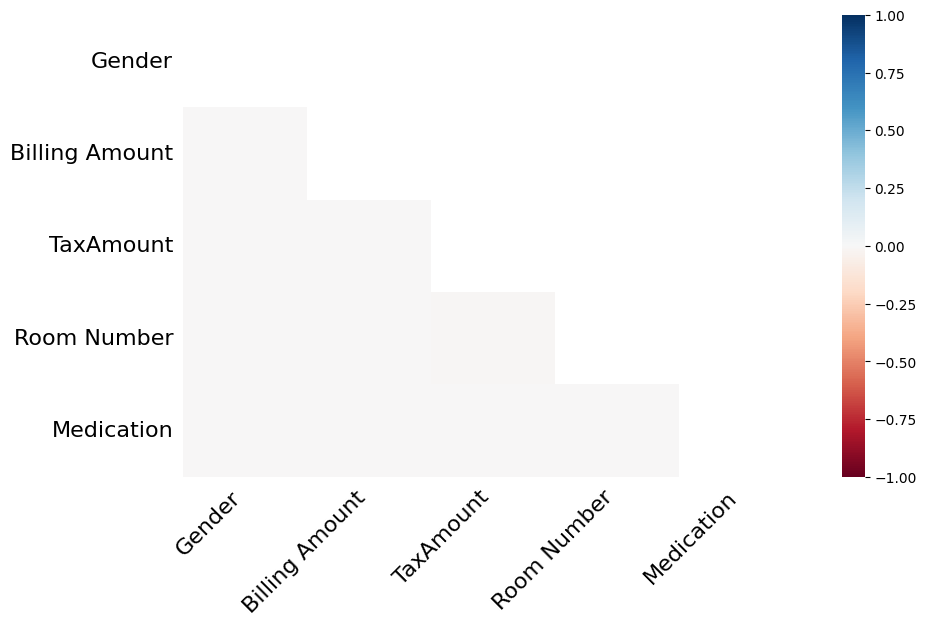

In [1854]:
msno.heatmap(df, figsize=(10,6))

<Axes: >

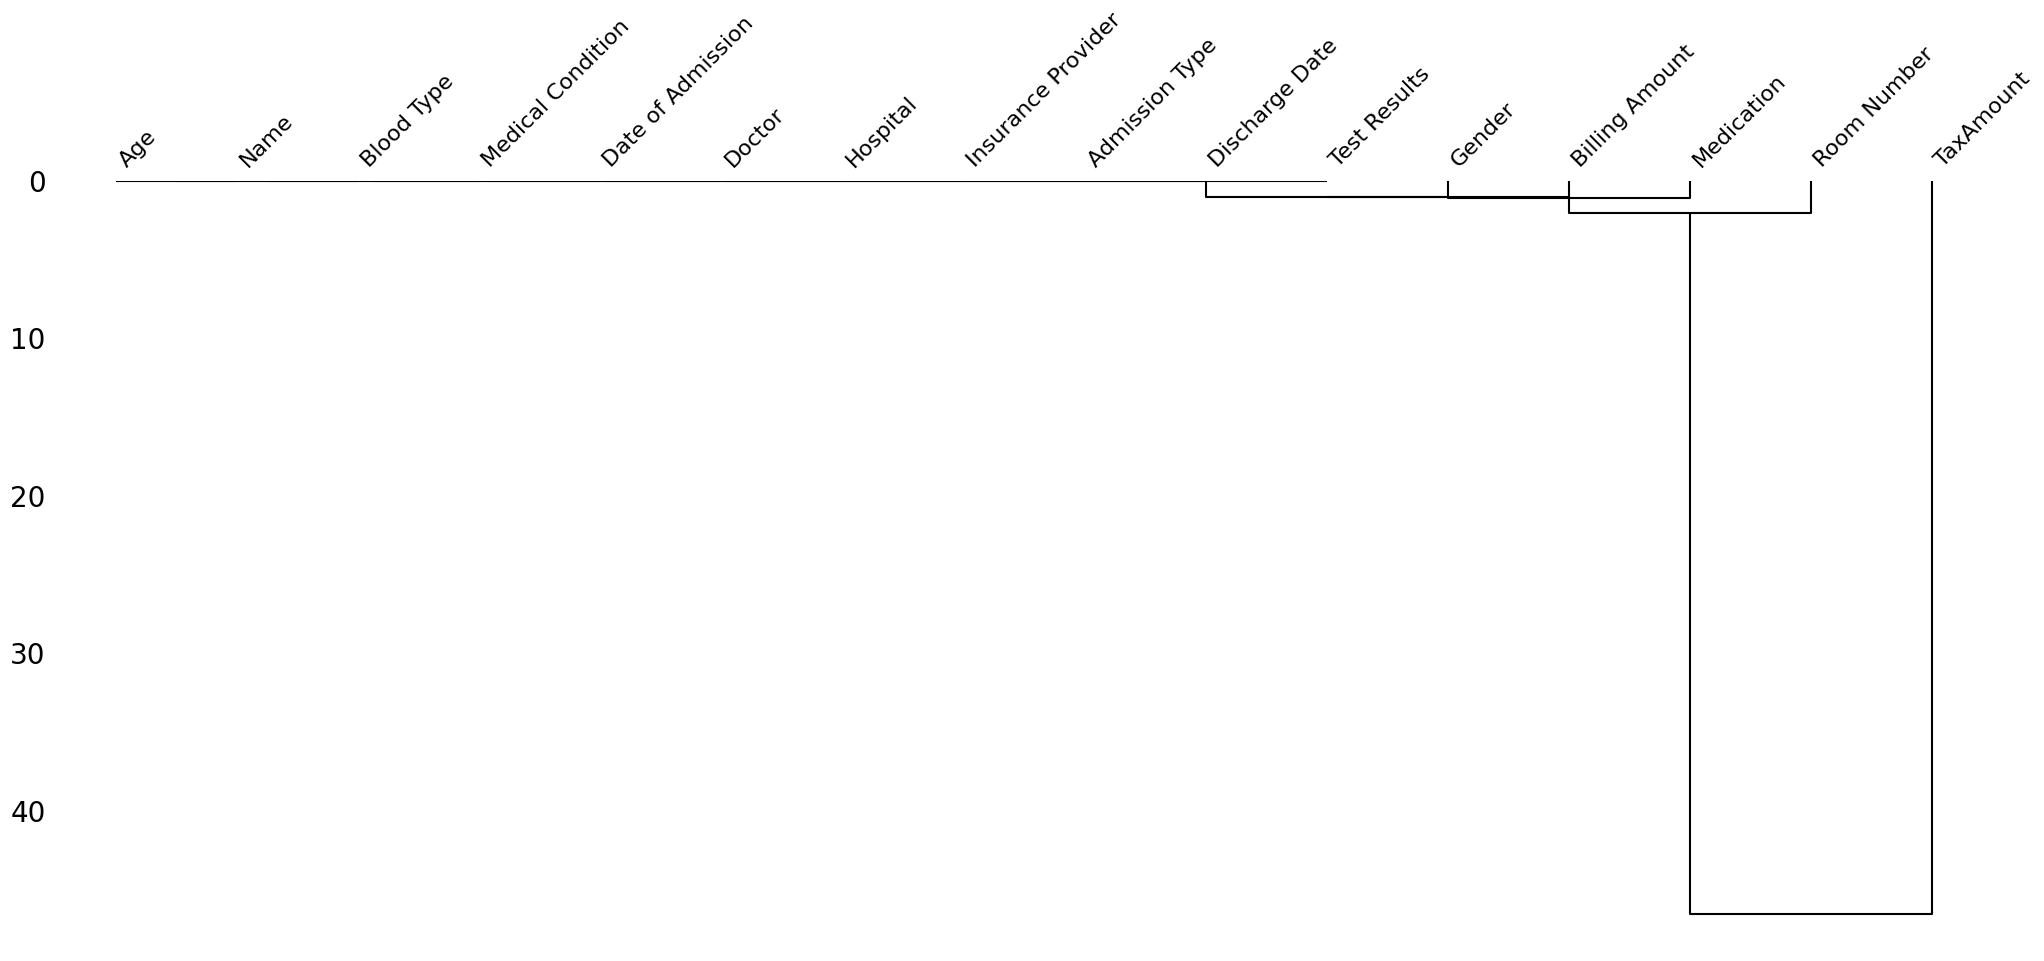

In [1855]:
msno.dendrogram(df)

### Gender
- because its a single case, just display the name of the missing gender row and manually update the gender

In [1856]:
null_gender_rows = df[df['Gender'].isnull()]
null_gender_rows

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,TaxAmount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,<NA>,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.98336,5623.647505,146.0,Elective,2022-12-01,Aspirin,Inconclusive


In [1857]:
gender_missing_index = null_gender_rows.index[0]
gender_missing_index

0

In [1858]:
# her name is TIFFANY so a female. lets update it as female
df.at[gender_missing_index, 'Gender'] = 'F'
df.head(gender_missing_index+1) # display that row

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,TaxAmount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,F,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.98336,5623.647505,146.0,Elective,2022-12-01,Aspirin,Inconclusive


In [1859]:
df.isnull().sum()

Name                     0
Age                      0
Gender                   0
Blood Type               0
Medical Condition        0
Date of Admission        0
Doctor                   0
Hospital                 0
Insurance Provider       0
Billing Amount           1
TaxAmount             2169
Room Number              4
Admission Type           0
Discharge Date           0
Medication               1
Test Results             0
dtype: int64

### Billing Amount
- because we dont know the potenial bill for the null case, we drop that row. 

In [1860]:
rows_before = len(df)
df = df.dropna(subset=['Billing Amount'])
rows_after = len(df)
print(f"Before: {rows_before}, After: {rows_after}, Dropped: {rows_before-rows_after}")

Before: 10042, After: 10041, Dropped: 1


In [1861]:
df.isnull().sum()

Name                     0
Age                      0
Gender                   0
Blood Type               0
Medical Condition        0
Date of Admission        0
Doctor                   0
Hospital                 0
Insurance Provider       0
Billing Amount           0
TaxAmount             2169
Room Number              4
Admission Type           0
Discharge Date           0
Medication               1
Test Results             0
dtype: int64

### Tax Amount
- now use the `average_tax_percentage` we computed above while cleaning and use it to fill all the empty values

In [1862]:
count_filled = 0
for index, row in df.iterrows():
    # Check if TaxAmount is null AND Billing Amount is valid (not null and not zero)
    if (pd.isna(row['TaxAmount']) and 
        not pd.isna(row['Billing Amount']) and 
        row['Billing Amount'] != 0):
        
        # Calculate tax using average percentage
        calculated_tax = (row['Billing Amount'] * average_tax_percent) / 100
        df.at[index, 'TaxAmount'] = calculated_tax
        count_filled += 1
        
count_filled

2169

In [1863]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
TaxAmount             0
Room Number           4
Admission Type        0
Discharge Date        0
Medication            1
Test Results          0
dtype: int64

### Medication
- here we have one empty cell. so one way is to drop it. but lets use some stretegy.
- there are many people with the same medical condition. lets first extract what medical condition the empty cell has. then lets extract all the medications given to the people with the SAME medical condition. now whatever people are given the most (mode), lets give it that medication.
- ai has been used here, i gave it the whole idea and prompt, it gave me code. 

In [1864]:
# Find row with missing medication
missing_med_row = df[df['Medication'].isna() & df['Medical Condition'].notna()]
missing_med_row

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,TaxAmount,Room Number,Admission Type,Discharge Date,Medication,Test Results
1,Ruben Burns,35,M,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.06485,7095.609727,404.0,Emergency,2023-06-15,<NA>,Normal


In [1865]:
if not missing_med_row.empty:
    # Get medical condition and row index
    condition = missing_med_row.iloc[0]['Medical Condition']
    row_index = missing_med_row.index[0]
    
    print(f"Found missing medication at row {row_index}")
    print(f"Medical Condition: {condition}")
    
    # Get all medications for this condition
    condition_meds = df[df['Medical Condition'] == condition]['Medication']
    med_counts = condition_meds.value_counts()
    
    print("\nMedication distribution for this condition:")
    print(med_counts)
    
    try:
        # Get mode (most common medication)
        most_common_med = mode(condition_meds)
        df.at[row_index, 'Medication'] = most_common_med
        
        print(f"\nAssigned medication: {most_common_med}")
    except:
        print("\nNo medication data available for this condition")
else:
    print("No rows with missing medication found")

Found missing medication at row 1
Medical Condition: Asthma

Medication distribution for this condition:
Medication
Aspirin        372
Lipitor        348
Penicillin     343
Ibuprofen      342
Paracetamol    311
Name: count, dtype: Int64

Assigned medication: Aspirin


In [1866]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
TaxAmount             0
Room Number           4
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

### Room Number
- so there are 4 empty cells out of 10022 cells. we can drop them.
- OR lets apply something meangingful. lets extract all the patients who have the same insurance provider, doctor and hospital and count what room numbers they are given.

In [1867]:
# Find row with missing medication
missing_room_row = df[df['Room Number'].isna()]
missing_room_row

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,TaxAmount,Room Number,Admission Type,Discharge Date,Medication,Test Results
8164,Sarah James,47,M,B+,Diabetes,2023-01-16,Michelle Murray,"Williams, Swanson and Rojas",Blue Cross,38848.17034,5827.225551,NaN,Emergency,2023-02-07,Penicillin,Abnormal
8169,Megan Gentry,25,M,O-,Cancer,2022-01-09,Stephen Smith,"Welch, Sanders and Jensen",Blue Cross,48006.40728,7200.961092,NaN,Emergency,2022-01-15,Aspirin,Abnormal
8174,Jordan Lee,72,M,O+,Hypertension,2023-09-30,Kimberly Mitchell,"Swanson, Byrd and Gonzalez",Medicare,11150.06481,1672.509722,NaN,Elective,2023-10-03,Penicillin,Normal
8177,Sue Perez,26,F,AB-,Asthma,2022-06-10,Joyce Oliver,Steele-Brown,Blue Cross,14443.69529,2166.554294,NaN,Elective,2022-06-11,Aspirin,Abnormal


In [1868]:
print(f"Found {len(missing_room_row)} rows with missing room numbers")

Found 4 rows with missing room numbers


In [1869]:
for index, row in missing_room_row.iterrows():
    insurance = row['Insurance Provider']
    hospital = row['Hospital']
    doctor = row['Doctor']
    row_index = index
    
    print(f"Found missing medication at row {row_index}")
    print(f"Insurance Provider: {insurance}")
    print(f"Hospital: {hospital}")
    print(f"Doctor: {doctor}")
    
    # Get matching room numbers (with proper boolean conditions)
    room_mask = (
        (df['Insurance Provider'] == insurance) & 
        (df['Hospital'] == hospital) & 
        (df['Doctor'] == doctor)
    )
    room_num = df.loc[room_mask, 'Room Number'].dropna()
    
    print(len(room_num))
    
    if not room_num.empty:
        counts = room_num.value_counts()
        print("\nRoom Number distribution:")
        print(counts)

Found missing medication at row 8164
Insurance Provider: Blue Cross
Hospital: Williams, Swanson and Rojas
Doctor: Michelle Murray
0
Found missing medication at row 8169
Insurance Provider: Blue Cross
Hospital: Welch, Sanders and Jensen
Doctor: Stephen Smith
0
Found missing medication at row 8174
Insurance Provider: Medicare
Hospital: Swanson, Byrd and Gonzalez
Doctor: Kimberly Mitchell
0
Found missing medication at row 8177
Insurance Provider: Blue Cross
Hospital: Steele-Brown
Doctor: Joyce Oliver
0


In [1870]:
# ok so none. lets try it without doctor
for index, row in missing_room_row.iterrows():
    insurance = row['Insurance Provider']
    hospital = row['Hospital']
    # doctor = row['Doctor']
    row_index = index
    
    print(f"Found missing medication at row {row_index}")
    print(f"Insurance Provider: {insurance}")
    print(f"Hospital: {hospital}")
    # print(f"Doctor: {doctor}")
    
    # Get matching room numbers (with proper boolean conditions)
    room_mask = (
        (df['Insurance Provider'] == insurance) & 
        (df['Hospital'] == hospital) 
        # (df['Doctor'] == doctor)
    )
    room_num = df.loc[room_mask, 'Room Number'].dropna()
    
    print(len(room_num))
    
    if not room_num.empty:
        counts = room_num.value_counts()
        print("\nRoom Number distribution:")
        print(counts)

Found missing medication at row 8164
Insurance Provider: Blue Cross
Hospital: Williams, Swanson and Rojas
0
Found missing medication at row 8169
Insurance Provider: Blue Cross
Hospital: Welch, Sanders and Jensen
0
Found missing medication at row 8174
Insurance Provider: Medicare
Hospital: Swanson, Byrd and Gonzalez
0
Found missing medication at row 8177
Insurance Provider: Blue Cross
Hospital: Steele-Brown
0


In [1871]:
# so none again. lets remove hospital as well
for index, row in missing_room_row.iterrows():
    insurance = row['Insurance Provider']
    # hospital = row['Hospital']
    # doctor = row['Doctor']
    row_index = index
    
    print(f"Found missing medication at row {row_index}")
    print(f"Insurance Provider: {insurance}")
    # print(f"Hospital: {hospital}")
    # print(f"Doctor: {doctor}")
    
    # Get matching room numbers (with proper boolean conditions)
    room_mask = (
        (df['Insurance Provider'] == insurance) 
        # (df['Hospital'] == hospital) 
        # (df['Doctor'] == doctor)
    )
    room_num = df.loc[room_mask, 'Room Number'].dropna()
    
    print(len(room_num))
    
    if not room_num.empty:
        counts = room_num.value_counts()
        print("\nRoom Number distribution:")
        print(counts)

Found missing medication at row 8164
Insurance Provider: Blue Cross
2034

Room Number distribution:
Room Number
295.0    12
196.0    12
145.0    11
340.0    10
290.0    10
         ..
101.0     1
322.0     1
133.0     1
126.0     1
410.0     1
Name: count, Length: 398, dtype: int64
Found missing medication at row 8169
Insurance Provider: Blue Cross
2034

Room Number distribution:
Room Number
295.0    12
196.0    12
145.0    11
340.0    10
290.0    10
         ..
101.0     1
322.0     1
133.0     1
126.0     1
410.0     1
Name: count, Length: 398, dtype: int64
Found missing medication at row 8174
Insurance Provider: Medicare
1936

Room Number distribution:
Room Number
230.0    12
257.0    11
416.0    11
468.0    11
224.0    11
         ..
430.0     1
158.0     1
328.0     1
141.0     1
131.0     1
Name: count, Length: 393, dtype: int64
Found missing medication at row 8177
Insurance Provider: Blue Cross
2034

Room Number distribution:
Room Number
295.0    12
196.0    12
145.0    11
340.0

In [1872]:
# okay good! lets assign the MODE of them.

for index, row in missing_room_row.iterrows():
    insurance = row['Insurance Provider']
    # hospital = row['Hospital']
    # doctor = row['Doctor']
    row_index = index
    
    print(f"Found missing medication at row {row_index}")
    print(f"Insurance Provider: {insurance}")
    # print(f"Hospital: {hospital}")
    # print(f"Doctor: {doctor}")
    
    # Get matching room numbers (with proper boolean conditions)
    room_mask = (
        (df['Insurance Provider'] == insurance) 
        # (df['Hospital'] == hospital) 
        # (df['Doctor'] == doctor)
    )
    room_num = df.loc[room_mask, 'Room Number'].dropna()
    
    print(len(room_num))
    
    if not room_num.empty:
        counts = room_num.value_counts()
        print("\nRoom Number distribution:")
        print(counts)
    
        try:
            # Get mode
            most_common = mode(room_num)
            df.at[index, 'Room Number'] = most_common
            print(f"\nAssigned room number: {most_common} \n\n")
        except:
            print("\nNo room number data available for this condition")

Found missing medication at row 8164
Insurance Provider: Blue Cross
2034

Room Number distribution:
Room Number
295.0    12
196.0    12
145.0    11
340.0    10
290.0    10
         ..
101.0     1
322.0     1
133.0     1
126.0     1
410.0     1
Name: count, Length: 398, dtype: int64

Assigned room number: 295.0 


Found missing medication at row 8169
Insurance Provider: Blue Cross
2035

Room Number distribution:
Room Number
295.0    13
196.0    12
145.0    11
340.0    10
290.0    10
         ..
101.0     1
322.0     1
133.0     1
126.0     1
410.0     1
Name: count, Length: 398, dtype: int64

Assigned room number: 295.0 


Found missing medication at row 8174
Insurance Provider: Medicare
1936

Room Number distribution:
Room Number
230.0    12
257.0    11
416.0    11
468.0    11
224.0    11
         ..
430.0     1
158.0     1
328.0     1
141.0     1
131.0     1
Name: count, Length: 393, dtype: int64

Assigned room number: 230.0 


Found missing medication at row 8177
Insurance Provider: 

In [1873]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
TaxAmount             0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

# Stastical Testing
here we perform stastical testing

## <span style="background-color: yellow"> Task 5 </span>
Univariate Analysis
- a. Histograms, boxplots, density plots of important numerical columns
- b. Frequency histograms of important categorical data
- c. Focus on outlier analysis, anomaly detection (if applicable)
- d. Provide brief interpretations of the findings, focusing on insights rather than code.

In [1874]:
important_numerical_columns = ['Age', 'Billing Amount', 'TaxAmount', 'Room Number']

In [1875]:
df.dtypes

Name                  string[python]
Age                            int64
Gender                string[python]
Blood Type            string[python]
Medical Condition     string[python]
Date of Admission     datetime64[ns]
Doctor                string[python]
Hospital              string[python]
Insurance Provider    string[python]
Billing Amount               float64
TaxAmount                    float64
Room Number                  float64
Admission Type        string[python]
Discharge Date        datetime64[ns]
Medication            string[python]
Test Results          string[python]
dtype: object

In [1876]:
important_categorical_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication', 'Test Results']
# hospital, doctor, insurance are not included as they were too diverse, as seen in task 3

### <span style="background-color: orange"> API WORK </span>
- here lets make a function `api_histogram` which makes a histogram
- same for `api_boxplot`, `api_density_plot`
- same for `api_frequency`

In [1877]:
def api_boxplot(df, col):
    fig, axs = plt.subplots(figsize=(8, 4))
    fig.suptitle(f"Univariate Analysis for {col}", fontsize=16)

    # Boxplot
    sns.boxplot(x=df[col])
    # axs[1].set_title("Boxplot")
    
    plt.tight_layout()
    plt.show()

In [1878]:
def api_histogram(df, col):
    fig, axs = plt.subplots(figsize=(8, 4))
    fig.suptitle(f"Univariate Analysis for {col}", fontsize=16)

    # Histogram
    sns.histplot(df[col], kde=False)
    # axs[0].set_title("Histogram")
    
    plt.tight_layout()
    plt.show()

In [1879]:
def api_density_plot(df, col):
    fig, axs = plt.subplots(figsize=(8, 4))
    fig.suptitle(f"Univariate Analysis for {col}", fontsize=16)

    # KDE/Distribution plot
    sns.kdeplot(df[col], fill=True)
    # axs[2].set_title("Density Plot")
    
    plt.tight_layout()
    plt.show()

In [1880]:
def api_frequency(df, col):
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Frequency of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### N U M E R I C A L

In [1881]:
len(important_numerical_columns)

4

### COL 1

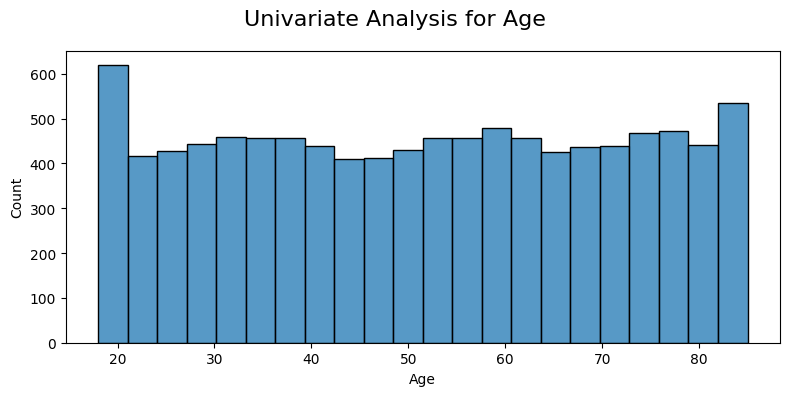

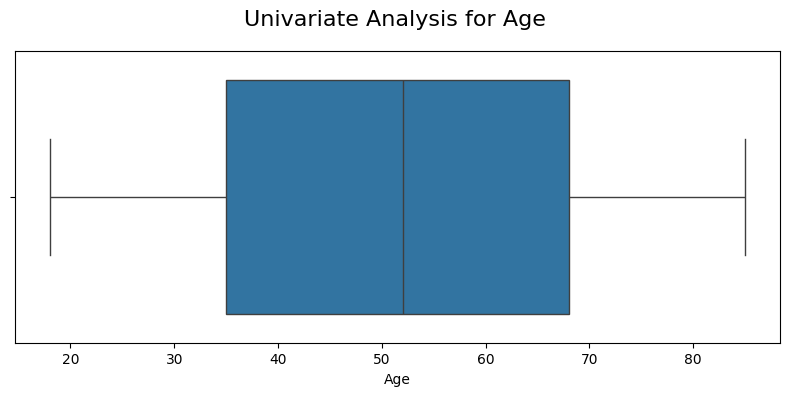

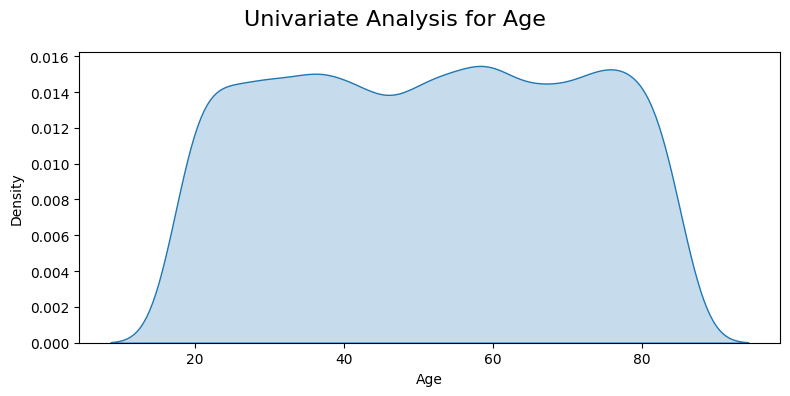

In [1882]:
col = important_numerical_columns[0]
api_histogram(df, col)
api_boxplot(df, col)
api_density_plot(df, col)

In [1883]:
# seems evenly distributed, more younger teenagers though.

### COL 2

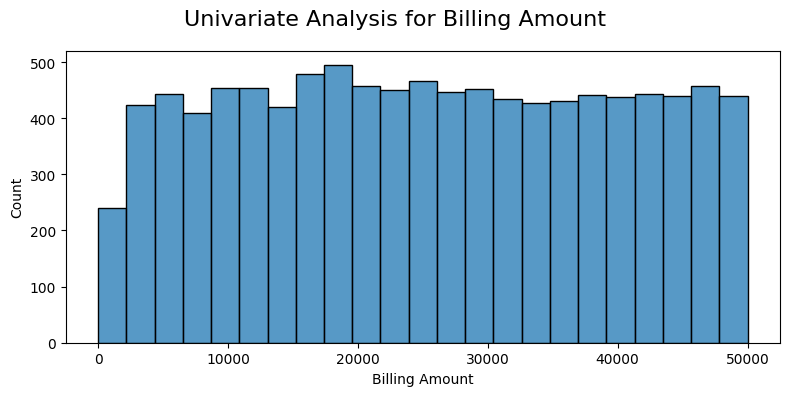

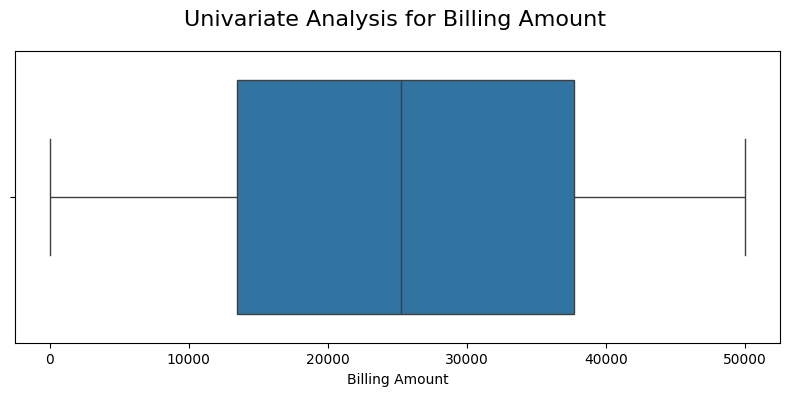

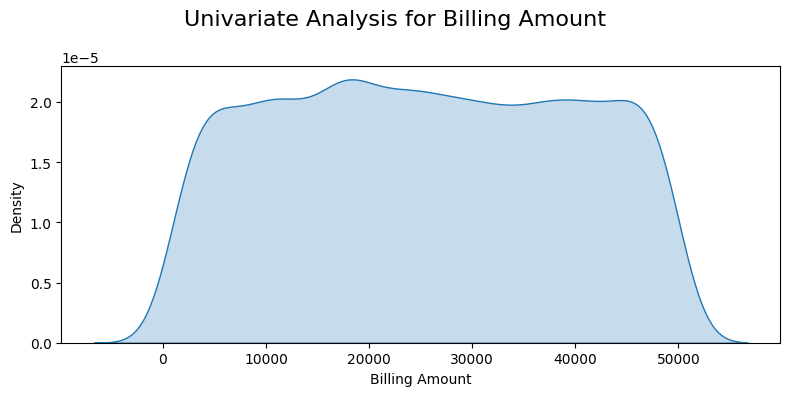

In [1884]:
col = important_numerical_columns[1]
api_histogram(df, col)
api_boxplot(df, col)
api_density_plot(df, col)

In [1885]:
# its highly likely that you wont get a smaller bill - however bills are distributed thus telling us that people are charged normally

### COL 3

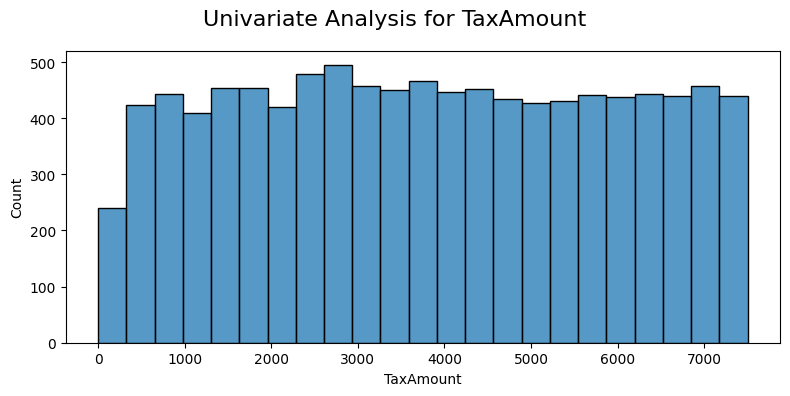

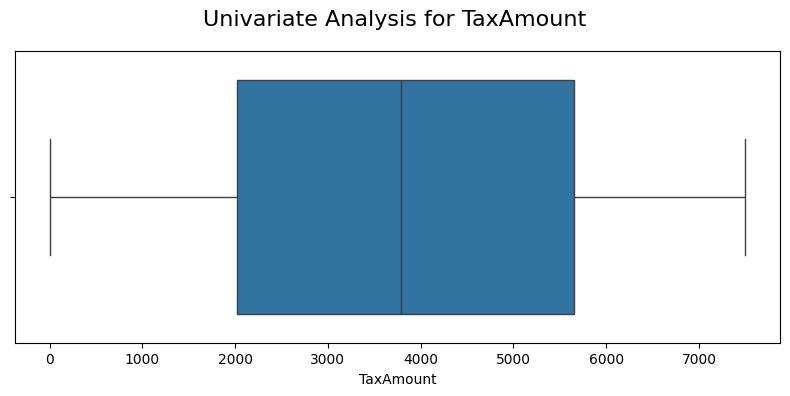

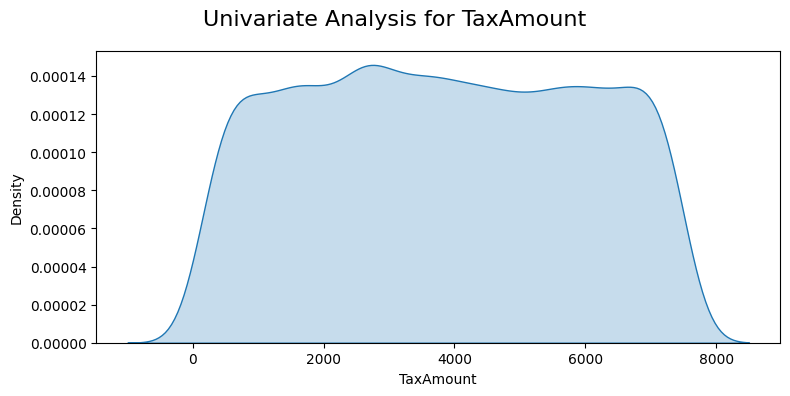

In [1886]:
col = important_numerical_columns[2]
api_histogram(df, col)
api_boxplot(df, col)
api_density_plot(df, col)

In [1887]:
# evenly distributed

### COL 4

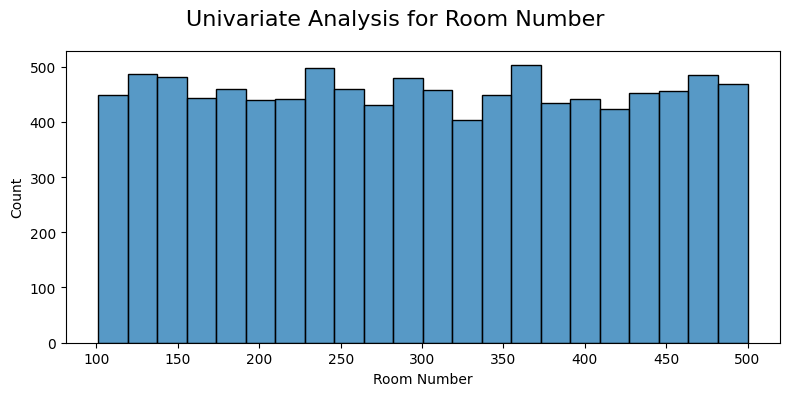

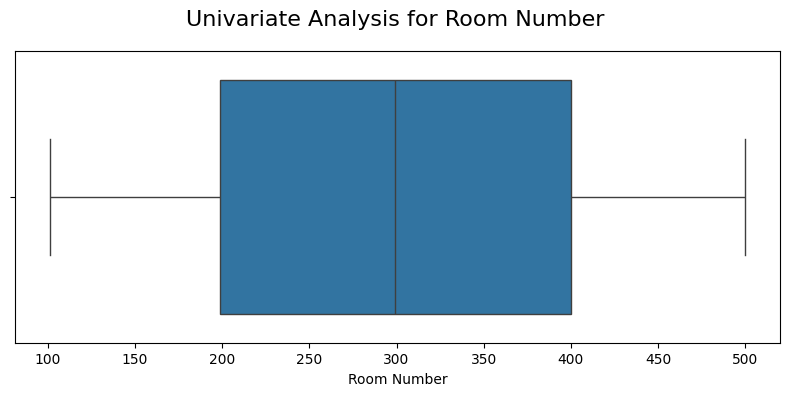

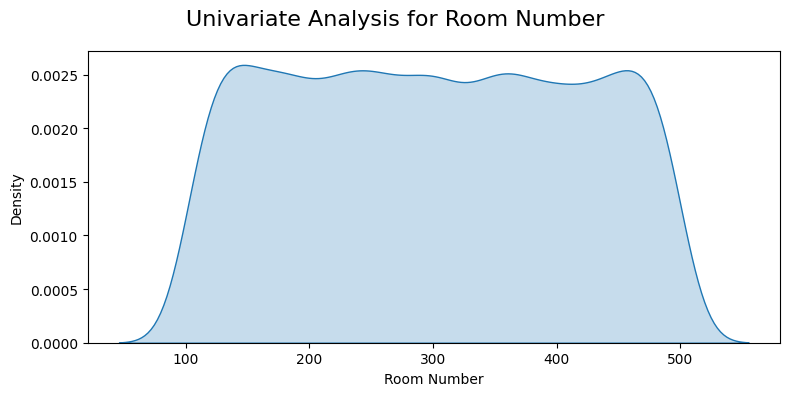

In [1888]:
col = important_numerical_columns[3]
api_histogram(df, col)
api_boxplot(df, col)
api_density_plot(df, col)

In [1889]:
# the chance of getting any room is even

### C A T E G O R I C A L

In [1890]:
len(important_categorical_columns)

6

### COL 1

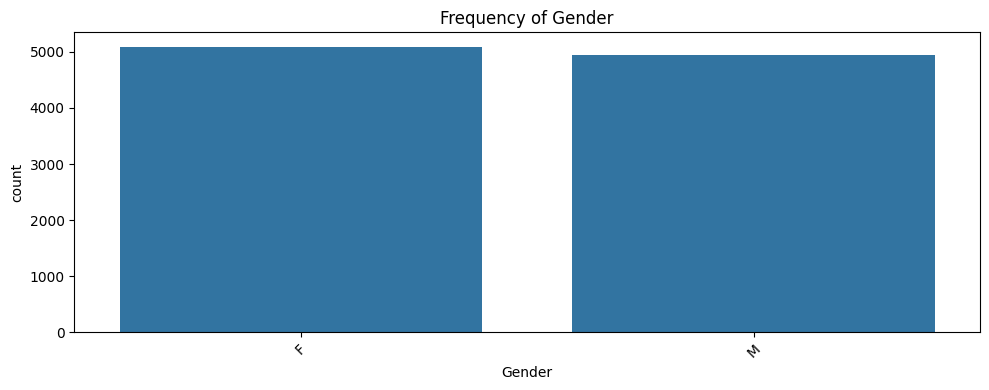

In [1891]:
col = important_categorical_columns[0]
api_frequency(df, col)

In [1892]:
# both genders get equal chance, no discrimination

### COL 2

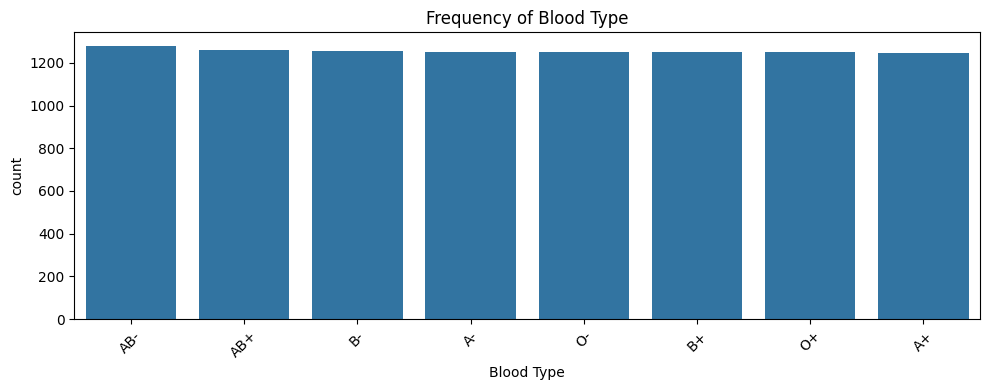

In [1893]:
col = important_categorical_columns[1]
api_frequency(df, col)

In [1894]:
# no rare blood types

### COL 3

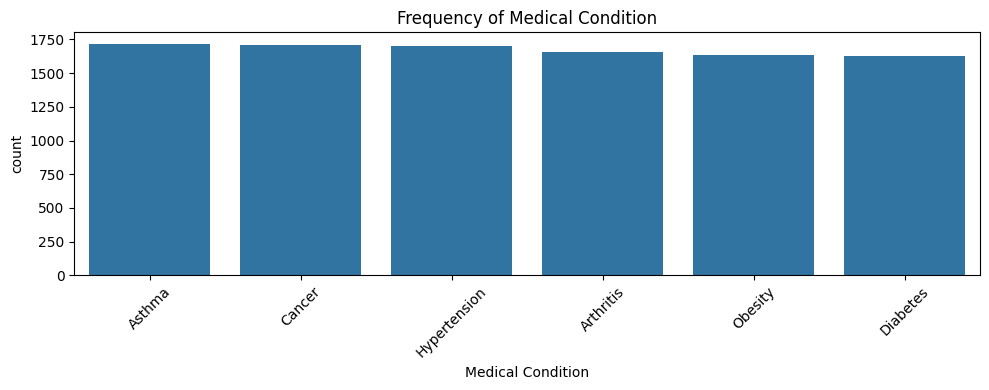

In [1895]:
col = important_categorical_columns[2]
api_frequency(df, col)

In [1896]:
# these 6 medical conditions are having equal probability - there are no rare ones.

### COL 4

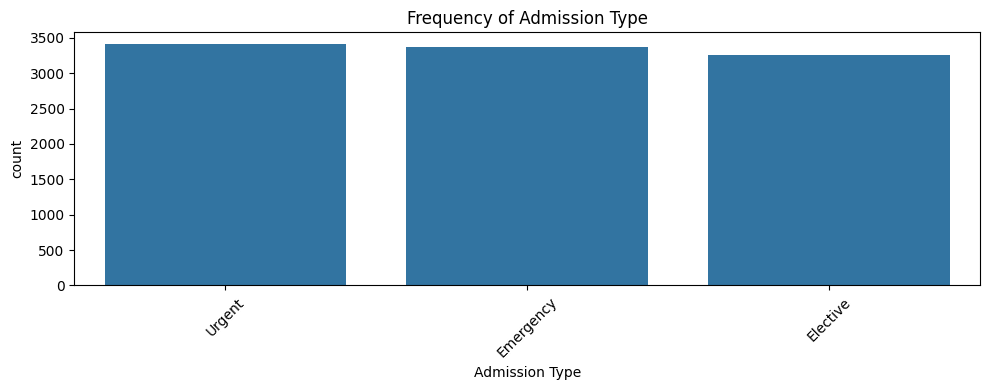

In [1897]:
col = important_categorical_columns[3]
api_frequency(df, col)

In [1898]:
# there is slighly more urgent admission types

### COL 5

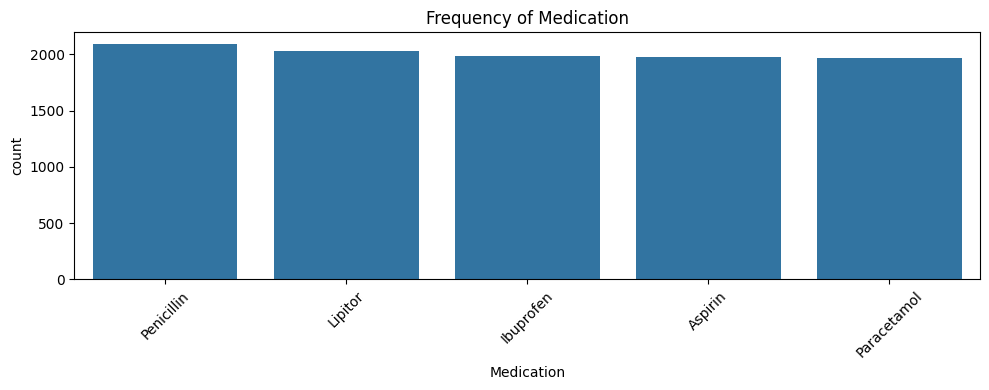

In [1899]:
col = important_categorical_columns[4]
api_frequency(df, col)

In [1900]:
# pencilin is most given, however all medications seem general purpose

### COL 6

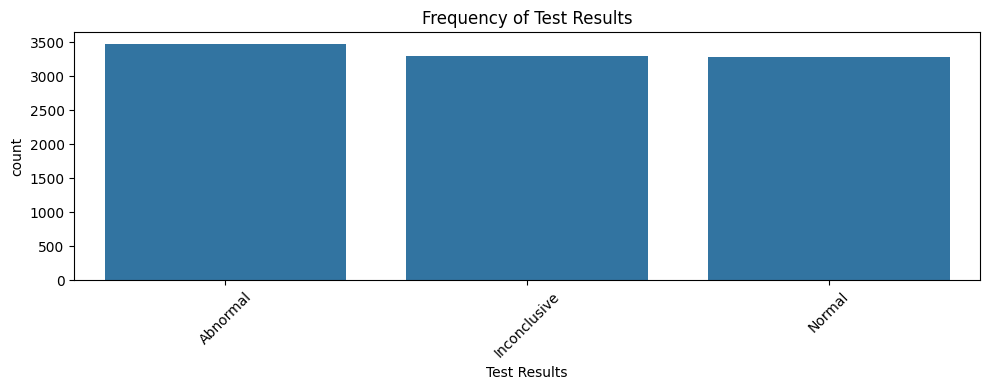

In [1901]:
col = important_categorical_columns[5]
api_frequency(df, col)

In [1902]:
# there is higher abnormal test results meaning people are sick more

### O U T L I E R
- we can see there are no outliers but lets just test it

### <span style="background-color: orange"> API WORK </span>
- for outlier analysis

In [1903]:
def api_view_outliers(df, col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  return outliers

In [1904]:
for col in important_numerical_columns:
    print(col)
    print(api_view_outliers(df, col) , "\n\n")

Age
Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, TaxAmount, Room Number, Admission Type, Discharge Date, Medication, Test Results]
Index: [] 


Billing Amount
Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, TaxAmount, Room Number, Admission Type, Discharge Date, Medication, Test Results]
Index: [] 


TaxAmount
Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, TaxAmount, Room Number, Admission Type, Discharge Date, Medication, Test Results]
Index: [] 


Room Number
Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, TaxAmount, Room Number, Admission Type, Discharge Date, Medication, Test Resul

In [1905]:
# so no outliers proved.

## <span style="background-color: yellow"> Task 6 </span>
Bivariate/Multi-variate Analysis
- a. Perform analysis using various statistical tests as studied including ANOVA, Ttest, Tukey, Chi-squared, and correlation heatmaps.
- b. Optionally, explore additional techniques like clustering or regression.
- c. Provide brief interpretations of the findings

### <span style="background-color: orange"> API WORK </span>
- for correlation heatmap: `numerical_vs_numerical`
- for annova and t-text: `numerical_vs_categorical`
- for chisquared: `categorical_vs_categorical`

In [1906]:
def api_numerical_vs_numerical(df):
    numeric_df = df.select_dtypes(include=['number'])
    # Calculate the correlation matrix
    correlation_matrix = numeric_df.corr()

    # Create the heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.title('Correlation Heatmap of Numerical Features')
    plt.show()

In [1907]:
def api_numerical_vs_categorical(df, numerical_cols, categorical_cols):
    for num_col in numerical_cols:
        for cat_col in categorical_cols:
            unique_vals = df[cat_col].dropna().unique()
            if len(unique_vals) == 2:
                # T-test
                groups = [df[df[cat_col] == val][num_col].dropna() for val in unique_vals]
                if all(len(g) > 1 for g in groups):
                    t_stat, p_val = ttest_ind(*groups)
                    print(f"T-test between {unique_vals[0]} and {unique_vals[1]} for {num_col}: t={t_stat:.2f}, p={p_val:.4f}")
            elif len(unique_vals) > 2:
                # ANOVA
                groups = [df[df[cat_col] == val][num_col].dropna() for val in unique_vals]
                if all(len(g) > 1 for g in groups):
                    f_stat, p_val = f_oneway(*groups)
                    print(f"ANOVA for {num_col} across {cat_col}: F={f_stat:.2f}, p={p_val:.4f}")
                    if p_val < 0.05:
                        tukey = pairwise_tukeyhsd(df[num_col], df[cat_col])
                        print(f"\nTukey HSD Post-Hoc Test for {num_col} vs {cat_col}")
                        print(tukey)

In [1908]:
def api_categorical_vs_categorical(df, categorical_cols):
    for i in range(len(categorical_cols)):
        for j in range(i + 1, len(categorical_cols)):
            col1 = categorical_cols[i]
            col2 = categorical_cols[j]
            contingency = pd.crosstab(df[col1], df[col2])
            if contingency.shape[0] > 1 and contingency.shape[1] > 1:
                chi2, p, dof, expected = chi2_contingency(contingency)
                print(f"Chi-squared Test between {col1} and {col2}: chi2={chi2:.2f}, p={p:.4f}")

### NUMERICAL VS NUMERICAL
- correlation heatmap

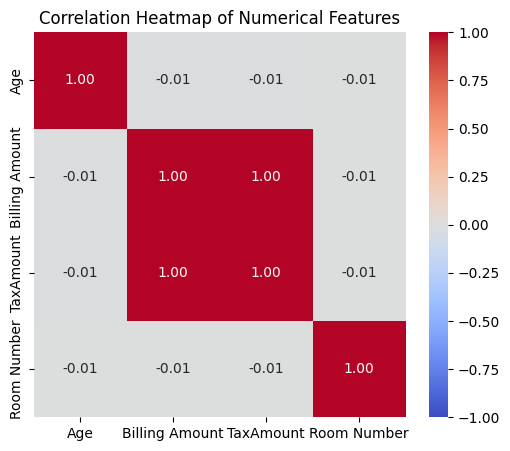

In [1909]:
api_numerical_vs_numerical(df)

In [1910]:
# so billing amount and tax amount are correlated. we already know this as tax = 15% of bill. 

### NUMERICAL VS CATEGORICAL
- annova and t-test

In [1911]:
api_numerical_vs_categorical(df, important_numerical_columns, important_categorical_columns)

T-test between F and M for Age: t=1.14, p=0.2534
ANOVA for Age across Blood Type: F=0.95, p=0.4671
ANOVA for Age across Medical Condition: F=0.63, p=0.6761
ANOVA for Age across Admission Type: F=0.12, p=0.8881
ANOVA for Age across Medication: F=0.34, p=0.8530
ANOVA for Age across Test Results: F=1.03, p=0.3573
T-test between F and M for Billing Amount: t=-0.32, p=0.7483
ANOVA for Billing Amount across Blood Type: F=1.37, p=0.2112
ANOVA for Billing Amount across Medical Condition: F=0.89, p=0.4890
ANOVA for Billing Amount across Admission Type: F=8.49, p=0.0002

Tukey HSD Post-Hoc Test for Billing Amount vs Admission Type
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------
 Elective Emergency -1162.9576 0.0022 -1972.1907 -353.7246   True
 Elective    Urgent   110.1971 0.9452  -697.2862  917.6804  False
Emergency    Urgent  1273.1547 0.0006   4

- gender does not impact patient
- cost, room number, bill all are independent of gender
- no effect of blood type
- no medical condition effects any age, charges, room number
- emergency patients are billed more
- cost is only affected by admission type and nothing else. medication may effect but not enough evudence

### CATEGORICAL VS CATEGORICAL
- chisquared

In [1912]:
api_categorical_vs_categorical(df, important_categorical_columns)

Chi-squared Test between Gender and Blood Type: chi2=8.87, p=0.2620
Chi-squared Test between Gender and Medical Condition: chi2=4.91, p=0.4275
Chi-squared Test between Gender and Admission Type: chi2=0.48, p=0.7866
Chi-squared Test between Gender and Medication: chi2=3.55, p=0.4707
Chi-squared Test between Gender and Test Results: chi2=3.66, p=0.1601
Chi-squared Test between Blood Type and Medical Condition: chi2=26.66, p=0.8431
Chi-squared Test between Blood Type and Admission Type: chi2=14.45, p=0.4171
Chi-squared Test between Blood Type and Medication: chi2=25.85, p=0.5813
Chi-squared Test between Blood Type and Test Results: chi2=10.82, p=0.6999
Chi-squared Test between Medical Condition and Admission Type: chi2=10.03, p=0.4377
Chi-squared Test between Medical Condition and Medication: chi2=20.40, p=0.4330
Chi-squared Test between Medical Condition and Test Results: chi2=7.84, p=0.6449
Chi-squared Test between Admission Type and Medication: chi2=5.73, p=0.6780
Chi-squared Test betw

- all are greater than 0.5 meaning no significant associations found
- everything is independent of each other

# AI USAGE
i have mentioned in the part i used AI, task 3, 4 were done by myself, in task 5 6 i used ai to help code plots.  
i used chatgpt

# Submission
save the df file at the end

In [1913]:
df.to_csv('data/Healthcare_cleaned.csv', index=False)  # Doesn't save row indices
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,TaxAmount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,F,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983360,5623.647505,146.0,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,M,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064850,7095.609727,404.0,Emergency,2023-06-15,Aspirin,Normal
2,Chad Byrd,61,M,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.897000,5531.234549,292.0,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,M,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322090,3495.498314,480.0,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,F,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344180,2712.951628,477.0,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10037,Christopher Delgado,69,F,A-,Obesity,2021-06-08,Susan Franklin,Harris LLC,UnitedHealthcare,41867.422770,6280.113415,292.0,Elective,2021-06-13,Aspirin,Normal
10038,Laura Banks,53,M,A-,Hypertension,2020-09-07,James Fleming,Rice-Hunter,Medicare,30326.548120,4548.982219,464.0,Urgent,2020-10-02,Ibuprofen,Abnormal
10039,John Johnson,58,F,B-,Obesity,2019-02-15,Blake Young,"Pruitt, Butler and Gonzales",Medicare,15650.891360,2347.633705,323.0,Emergency,2019-03-13,Aspirin,Abnormal
10040,Craig Garcia,32,M,B-,Asthma,2023-07-07,Bradley Jones,Morris Inc,Blue Cross,23674.450000,3551.167500,457.0,Emergency,2023-07-08,Ibuprofen,Normal
